# Q-Learning in Reinforcement Learning

Q-Learning is most primitive, but big part of algorithms to learn reinforcement learning.

In order to understand how it works, first let's consider the expected rewards as follows.

$$ R = \sum_{t=0}^{\infty} {\gamma^t r_t} $$

where $r_t$ is a reward value obtained at $t$ and $\gamma$ is discount.

For instance, when you try to grab an object, you will do the following 3 actions :

- action #1 : Stretch your arm ($t=0$)<br>
  Getting reward 0.
- action #2 : Open your hand ($t=1$)<br>
  Getting reward 0.
- action #3 : Grab an object ($t=2$)<br>
  Getting reward 10.

In this case, you will get a reward value 10 on action #3 ($t=2$), however the action #1 ($t=0$) is obviously contributing to the final rewards. Hence, we consider that the action #1 will have the following expected cumulative reward.<br>
Here we assume $\gamma$ is 0.99.

$$ R_{t=0} = 0 + 0.99 \times 0 + 0.99^2 \times 10 = 9.801 $$

Same as above, $R_{t=1} = 9.9, R_{t=2} = 10$.

Q-value is based on this idea of expected cumulative reward. Depending on each state (observation), the each action will have the corresponding expected reward.<br>
In above example, if you see an object in front of you (i.e, the **state** of "you see an object"), the **action** "stretching your arm" will have high value of expected reward. However, if you cannot see an object anywhere, the action "stretching your arm" will have low value of expected reward.

Q-value of each corresponding state and action is denoted as $Q(s, a)$. Suppose both action and state has 1 dimension of discrete values, $Q(s, a)$ will be written as a table (called Q-Table) as follows.<br>
If the state is s2, the optimal action to pick up will be action a2. If s3, the optimal action will be action a4.

![Q-Table](assets/q-table.png?raw=true)

In practice, both action space and observation space may have more than 1 dimension. For instance, in CartPole example (below example), the returned state (observation) has 4 elements of float values, i.e, 4 dimensions. (See [readme.md](https://github.com/tsmatz/reinforcement-learning-tutorials/) for CartPole.) Then Q-Table will be the combination of 1 dimension (action space) and 4 dimension (observation space).

In Q-Learning, we optimize this table by the following iterative updates ($t=0,1,2,\ldots$).<br>
In the following equation, $ Q_t(s_t,a_t) $ is current Q-value and $ Q_{t+1}(s_t,a_t) $ is the updated Q-value.

$$ Q_{t+1}(s_t,a_t) = Q_t(s_t,a_t) + \alpha \left( r_t + \gamma \max_a{Q_t(s_{t+1},a)} - Q_t(s_t,a_t) \right) $$

where $\alpha$ is learning rate.

This equation means that :

- Suppose, you executed an action $a_t$ on state $s_t$, and as a result, you got reward $r_t$ and the state has changed to $s_{t+1}$.
- The optimal next action will satisfy $a_{t+1}=\max_{a}{Q(s_{t+1},a)}$.<br>
  By taking this optimal action, you will then get the expected reward : $r_t + \gamma \max_{a}{Q(s_{t+1},a)}$.
- Compare this optimal q-value with current q-value $Q(s_t,a_t)$ in q-table. Then update this current value $Q(s_t,a_t)$ by learning rate $\alpha$.<br>
  This will result into above equation.

Now let's build this Python example with CartPole environment. (See [readme.md](https://github.com/tsmatz/reinforcement-learning-tutorials/) about CartPole.)

*(back to [index](https://github.com/tsmatz/reinforcement-learning-tutorials/))*

<font color="lightblue">

Q-Learning is een fundamenteel algoritme in reinforcement learning. Het idee is om een agent te leren welke acties het beste zijn om uit te voeren in een bepaalde staat, gebaseerd op een beloningssysteem.

In Q-Learning wordt een waarde (Q-waarde) toegekend aan elke mogelijke actie in elke mogelijke staat. Deze Q-waarden worden opgeslagen in een tabel, de Q-tabel. De Q-waarde van een actie in een bepaalde staat is de verwachte cumulatieve beloning die de agent zal ontvangen als hij die actie uitvoert en vervolgens de optimale acties voor de volgende staten kiest.

Het algoritme werkt door de Q-waarden iteratief bij te werken op basis van de beloningen die de agent ontvangt voor het uitvoeren van acties. De Q-waarde voor een staat en actie wordt bijgewerkt door de huidige Q-waarde te nemen en deze te verhogen of te verlagen op basis van het verschil tussen de ontvangen beloning en de verwachte beloning.

Het doel van Q-Learning is om de Q-tabel zo te optimaliseren dat de agent uiteindelijk leert welke acties de hoogste cumulatieve beloningen opleveren in elke staat. Dit stelt de agent in staat om optimale beslissingen te nemen.

</font>

First, please install the required packages and import these modules.

In [1]:
!pip install numpy gym matplotlib

In [2]:
import gym
import numpy as np

CartPole has 4 elements of continuos (float) observation space. In order for applying primitive Q-Learning, we should convert continuous state to discrete state (i.e, **discretize**).<br>
In this example, we will convert Tuple(Box, Box, Box, Box) into Tuple(Discrete(20), Discrete(20), Discrete(20), Discrete(20)) - which converts float value to the bin of value for each segment.

![discretize](assets/discretize.png?raw=true)

In [3]:
import math

env = gym.make("CartPole-v1")

new_observation_shape = (20, 20, 20, 20)

bins = []
for i in range(4):
    item = np.linspace(
        env.observation_space.low[i] if (i == 0) or (i == 2) else -4,
        env.observation_space.high[i] if (i == 0) or (i == 2) else 4,
        num=new_observation_shape[i],
        endpoint=False)
    item = np.delete(item, 0)
    bins.append(item)
    print(bins[i])

# define function to convert to discrete state
def get_discrete_state(s):
    new_s = []
    for i in range(4):
        new_s.append(np.digitize(s[i], bins[i]))
    return new_s

[-4.32000017 -3.84000015 -3.36000013 -2.88000011 -2.4000001  -1.92000008
 -1.44000006 -0.96000004 -0.48000002  0.          0.48000002  0.96000004
  1.44000006  1.92000008  2.4000001   2.88000011  3.36000013  3.84000015
  4.32000017]
[-3.6 -3.2 -2.8 -2.4 -2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6
  2.   2.4  2.8  3.2  3.6]
[-0.37699113 -0.33510323 -0.29321532 -0.25132742 -0.20943952 -0.16755161
 -0.12566371 -0.08377581 -0.0418879   0.          0.0418879   0.08377581
  0.12566371  0.16755161  0.20943952  0.25132742  0.29321532  0.33510323
  0.37699113]
[-3.6 -3.2 -2.8 -2.4 -2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6
  2.   2.4  2.8  3.2  3.6]


<font color="lightblue">

In dit voorbeeld wordt een continue toestand (float waarden) van de CartPole-omgeving omgezet naar een discrete toestand, zodat primitieve Q-Learning kan worden toegepast. De CartPole-omgeving heeft vier elementen in de observatieruimte, die elk een continue waarde hebben. Om Q-Learning te gebruiken, moeten deze waarden worden gediscretiseerd, oftewel omgezet in een eindig aantal discrete staten.

Dit gebeurt door de continue waarden op te splitsen in bins (segmenten). Voor elk van de vier elementen in de observatieruimte worden er 20 bins gemaakt. Deze bins worden gedefinieerd met behulp van de np.linspace functie, die de waarden gelijkmatig verdeelt tussen een minimum en maximum. Voor de eerste en derde elementen worden de grenzen van de observatieruimte van de omgeving gebruikt, terwijl voor de tweede en vierde elementen de grenzen -4 en 4 worden gebruikt.

De get_discrete_state functie neemt vervolgens een continue toestand als invoer en geeft een gediscretiseerde toestand terug door de continue waarden te vergelijken met de bins en te bepalen in welke bin elk waarde valt.

Samengevat, de code converteert de continue observatieruimte naar een discrete ruimte met 20 segmenten per element, wat nodig is voor de toepassing van Q-Learning.

</font >

Now we generate Q-Table $Q(s,a)$ and initialize all values by 0. (Here it's 5 dimensional table.)

In [4]:
q_table = np.zeros(new_observation_shape + (env.action_space.n,))
q_table.shape

(20, 20, 20, 20, 2)

Now, update Q-Table with above Q-Learning algorithm.

However, in the beginning, Q-Table was initialized all by zeros (not optimized at all) and will always pick up wrong actions. Therefore, the action is randomly picked up to explore in the first stage, and when it grows to learn, it then picks up the optimal actions with Q-Table gradually using the following coefficient parameter $\epsilon$ to control. (This exploration algorithm is called **Epsilon-Greedy**.)

In [5]:
gamma = 0.99
alpha = 0.1
epsilon = 1
epsilon_decay = epsilon / 4000

# pick up action from q-table with greedy exploration
def pick_sample(s, episode_num):
    # get optimal action,
    # but with greedy exploration (to prevent picking up same values in the first stage)
    if np.random.random() > epsilon:
        a = np.argmax(q_table[tuple(s)])
    else:
        a = np.random.randint(0, env.action_space.n)
    return a

env = gym.make("CartPole-v1")
reward_records = []
for i in range(6000):
    # Run episode till done
    done = False
    total_reward = 0
    s, _ = env.reset()
    s_dis = get_discrete_state(s)
    while not done:
        a = pick_sample(s_dis, i)
        s, r, term, trunc, _ = env.step(a)
        done = term or trunc
        s_dis_next = get_discrete_state(s)

        # Update Q-Table
        maxQ = np.max(q_table[tuple(s_dis_next)])
        q_table[tuple(s_dis)][a] += alpha * (r + gamma * maxQ - q_table[tuple(s_dis)][a])

        s_dis = s_dis_next
        total_reward += r

    # Update epsilon for each episode
    if epsilon - epsilon_decay >= 0:
        epsilon -= epsilon_decay

    # Record total rewards in episode (max 500)
    print("Run episode{} with rewards {}".format(i, total_reward), end="\r")
    reward_records.append(total_reward)

print("\nDone")
env.close()

C:\Users\Ed\.conda\envs\Minor\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Run episode5999 with rewards 500.0
Done


<font color="lightblue">

Natuurlijk! Hier is een globaal overzicht van wat de code doet en waarom:

De code implementeert het Q-Learning algoritme om de CartPole-omgeving te trainen. In de CartPole-omgeving moet een agent een paal in evenwicht houden door een karretje naar links of rechts te bewegen. Om dit te bereiken, gebruikt de agent een Q-Table die de waarde van acties in verschillende toestanden opslaat.

### Belangrijkste concepten en processen:

1. **Discretisatie van de toestandsruimte**:
   - De continue observatieruimte van de CartPole-omgeving (met vier variabelen) wordt gediscretiseerd in 20 bins voor elk van de vier variabelen. Dit betekent dat elke continue waarde wordt omgezet naar een discrete waarde, wat het eenvoudiger maakt om de Q-Table te gebruiken.

2. **Epsilon-Greedy Exploratie**:
   - In het begin heeft de Q-Table geen informatie, dus kiest de agent willekeurig acties om de omgeving te verkennen. Dit wordt gecontroleerd door de epsilon-parameter, die initieel op 1 is ingesteld (volledige exploratie). Na verloop van tijd wordt epsilon verlaagd, waardoor de agent geleidelijk meer vertrouwen krijgt in de geleerde Q-waarden en minder willekeurige acties onderneemt.

3. **Q-Table Update**:
   - Terwijl de agent de omgeving verkent, worden de Q-waarden in de Q-Table continu bijgewerkt op basis van de ontvangen beloningen. Dit gebeurt volgens de Q-Learning update-regel, waarbij de Q-waarde voor een bepaalde toestand en actie wordt aangepast op basis van de beloning en de geschatte waarde van de volgende toestand.

4. **Training**:
   - De agent voert duizenden episodes uit, waarbij hij telkens de omgeving reset en probeert de paal zo lang mogelijk in evenwicht te houden. Tijdens elke episode kiest de agent acties, observeert de resultaten, en past de Q-waarden aan. Het doel is om na verloop van tijd een Q-Table te leren die de agent in staat stelt om optimale beslissingen te nemen.

5. **Resultaten vastleggen**:
   - De totale beloning voor elke episode wordt geregistreerd om de voortgang van de agent te volgen. Aan het einde van de training kan deze informatie worden gebruikt om te evalueren hoe goed de agent de taak heeft geleerd.

In essentie leert de agent door middel van trial-and-error en beloning het optimale gedrag om de paal in evenwicht te houden. Het Q-Learning algoritme, gecombineerd met de epsilon-greedy strategie, zorgt ervoor dat de agent zowel nieuwe acties verkent als gebruik maakt van de geleerde kennis om de prestaties te verbeteren.

</font>

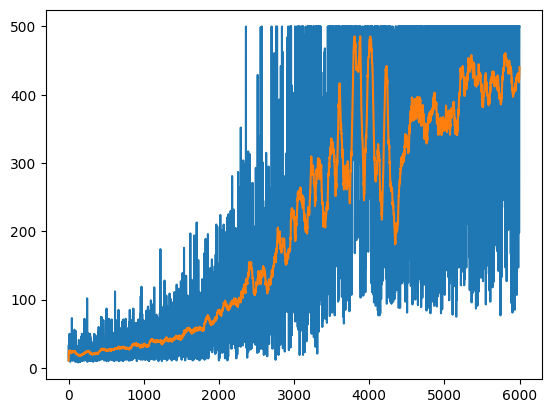

In [6]:
import matplotlib.pyplot as plt
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
# Plot
plt.plot(reward_records)
plt.plot(average_reward)

As you can see above, this method won't work in large continuous and stochastic spaces (e.g, continuos action space), since this method will need so many discrete mesh for solving problems.<br>
In the next tutorial, we'll learn the idea of policy gradient methods, which will take effects in such a case.

<font color="lightblue">

De code voert Q-Learning uit op de CartPole-omgeving en visualiseert de leerprogressie door de totale beloningen per episode en de gemiddelde beloningen over intervallen van 50 episodes te plotten.
Wat gebeurt er en waarom?

1. Gemiddelde beloning berekenen:
    - De code berekent het voortschrijdend gemiddelde van de beloningen over de laatste 50 episodes. Dit wordt gedaan om een beter inzicht te krijgen in de leerprogressie van de agent, omdat individuele beloningen per episode sterk kunnen variëren.

2. Plotten van beloningen:
    - Er worden twee grafieken geplot:
        - Totale beloningen per episode: Deze grafiek toont de beloning die de agent behaalde in elke individuele episode.
        - Gemiddelde beloningen: Deze grafiek toont het voortschrijdend gemiddelde van de beloningen over de laatste 50 episodes. Dit geeft een gladder beeld van de leertrend en helpt ruis te verminderen.

3. Observaties uit de plot:
    - In de plot is te zien dat de beloningen en de gemiddelde beloningen geleidelijk toenemen naarmate de agent meer episodes doorloopt.
    - Na ongeveer 3500 episodes bereiken de beloningen vaak het maximum van 500, en de gemiddelde beloningen liggen rond de 350+. Dit duidt erop dat de agent het probleem steeds beter leert oplossen.

4. Beperkingen van de methode:
    - De code benadrukt een belangrijk punt: deze discretisatiemethode werkt goed voor problemen met een beperkte en goed gedefinieerde toestandsruimte zoals CartPole. Echter, voor grote continue en stochastische ruimtes (zoals continue actieruimtes) zal deze methode minder effectief zijn.
    - Dit komt omdat het discretiseren van een grote continue ruimte resulteert in een exponentiële toename van het aantal te leren toestanden (het zogenaamde "curse of dimensionality"). Hierdoor wordt het leren onpraktisch vanwege de enorme hoeveelheid geheugen en rekentijd die nodig is om de Q-Table bij te houden en te updaten.

Samengevat:

De code demonstreert hoe een agent door middel van Q-Learning kan leren in een gediscretiseerde CartPole-omgeving. De beloningsgrafieken tonen de vooruitgang van de agent, maar de methode is beperkt tot kleine en goed gedefinieerde ruimtes. Voor grotere en complexere ruimtes is deze aanpak niet praktisch vanwege de exponentiële toename in complexiteit en benodigde middelen.

</font>